In [1]:
from array import array
import numpy as np
import math

# Projectile Motion with Air Resistance

Projectile motion in two dimensions is governed by a fairly simple set of coupled differential equations:

The acceleration components are defined as:

$$ a_x(t) = \frac{F_x(t)}{m} = \frac{d v_x(t)}{dt}$$
$$ a_y(t) = \frac{F_y(t)}{m} = \frac{d v_y(t)}{dt}$$

The velocity components are defined as:

$$ v_x(t) = \frac{d x(t)}{dt}$$
$$ v_y(t) = \frac{d y(t)}{dt}$$

In the previous example, with no air resistance, we saw that for these differential equations, the midpoint method gave the most accurate numerical answers, for a given timestep.  We will use the midpoint method again here, but we will need to modify the acceleration components to include the effects of air resistance.  The force of air resistance is given by:

$$ F_{air} = -\frac{1}{2} C_d \rho A v^2 $$

where $C_d$ is the drag coefficient, $\rho$ is the density of air, $A$ is the cross-sectional area of the projectile, and $v$ is the magnitude of the velocity of the projectile.  The direction of the force is opposite the direction of the velocity.  The acceleration components are then:

$$ a_x(t) = \frac{F_x(t)}{m} = \frac{d v_x(t)}{dt} = -\frac{1}{2} C_d \rho A \frac{v_x(t)}{m} v(t)$$
$$ a_y(t) = \frac{F_y(t)}{m} = \frac{d v_y(t)}{dt} = -\frac{1}{2} C_d \rho A \frac{v_y(t)}{m} v(t) - g$$

where $g$ is the acceleration due to gravity.  We can simplify these equations by defining a constant:

$$ k = -\frac{1}{2} C_d \rho A \frac{1}{m}$$

and then the acceleration components become:

$$ a_x(t) = \frac{d v_x(t)}{dt} = k v(t) v_x(t)$$
$$ a_y(t) = \frac{d v_y(t)}{dt} = k v(t) v_y(t) - g$$

We can then use the midpoint method to solve these differential equations.

As before, we will always need to know a set of initial conditions:  the initial velocity in the x- and y-directions, and the initial position in the x- and y-directions:  $v_x(0) = v_{x0}, v_y(0) = v_{y0}, x(0) = x_0, y(0) = y_0$

In [2]:
# Initial Conditions
speed = 55.8
theta = 45.0
y1 = 0.0


# Other constants - golf ball - D = 0.0427m, m = 0.04593kg
Cd = 0.20 # drag coefficient
area = 0.001432 # cross sectional area of projectile
grav = 9.81 # gravitional acceleration
mass = 0.04593 # mass in kg
rho = 1.225 # density of air (kg/m^3)
air_const = -0.5*Cd*rho*area/mass
Pi = math.pi

In [3]:
r1 = array('d')
v1 = array('d')
r = array('d')
v = array('d')
accel = array('d')

r1.append(0)
r1.append(y1)
v1.append(speed*math.cos(theta*Pi/180.0))
v1.append(speed*math.sin(theta*Pi/180.0))

r.append(r1[0])
r.append(r1[1])
v.append(v1[0])
v.append(v1[1])
accel.append(0)
accel.append(0)

In [4]:
# Setup arrays for Euler and Euler-Cromer Methods
re = array('d')
ve = array('d')
accele = array('d')

re.append(r1[0])
re.append(r1[1])
ve.append(v1[0])
ve.append(v1[1])
accele.append(0)
accele.append(0)

rec = array('d')
vec = array('d')
accelec = array('d')

rec.append(r1[0])
rec.append(r1[1])
vec.append(v1[0])
vec.append(v1[1])
accelec.append(0)
accelec.append(0)


In [5]:
tau = 0.02 # timestep in seconds
maxStep = 1000000 # maximum number of steps

xplot = array('d')
yplot = array('d')
xplote = array('d')
yplote = array('d')
xplotec = array('d')
yplotec = array('d')
xNoAir = array('d')
yNoAir = array('d')
time = array('d')
timee = array('d')
timeec = array('d')
timeNoAir = array('d')

In [6]:
endtime = 0
nelements = 0
for iStep in range(1,maxStep+1):
    
    t = (iStep-1)*tau
        
    xplot.append(r[0])
    yplot.append(r[1])
    xplote.append(re[0])
    yplote.append(re[1])
    xplotec.append(rec[0])
    yplotec.append(rec[1])
    xNoAir.append(r1[0]+v1[0]*t)
    yNoAir.append(r1[1]+v1[1]*t-0.5*grav*t*t)
    
    timeNoAir.append(t)
    time.append(t)
    timee.append(t)
    timeec.append(t)
    
    # Euler Method
    normVe = math.sqrt(ve[0]*ve[0]+ve[1]*ve[1])
    accele[0]=air_const*normVe*ve[0]
    accele[1]=air_const*normVe*ve[1]-grav
    re[0] = re[0] + tau*ve[0]
    re[1] = re[1] + tau*ve[1]
    ve[0] = ve[0] + tau*accele[0]
    ve[1] = ve[1] + tau*accele[1]
    
    # Euler-Cromer Method
    normVec = math.sqrt(vec[0]*vec[0]+vec[1]*vec[1])
    accelec[0]=air_const*normVec*vec[0]
    accelec[1]=air_const*normVec*vec[1]-grav
    vec[0] = vec[0] + tau*accelec[0]
    vec[1] = vec[1] + tau*accelec[1]    
    rec[0] = rec[0] + tau*vec[0]
    rec[1] = rec[1] + tau*vec[1]
    
    # MidPoint Method
    normV = math.sqrt(v[0]*v[0]+v[1]*v[1])
    accel[0]=air_const*normV*v[0]
    accel[1]=air_const*normV*v[1]-grav
    vxnew = v[0] + tau*accel[0]
    vynew = v[1] + tau*accel[1]
    r[0] = r[0] + tau*(v[0] + vxnew)/2.0
    r[1] = r[1] + tau*(v[1] + vynew)/2.0
    v[0] = vxnew
    v[1] = vynew    
    
    #print ("x = %f     vx = %f    ax = %f" %(r[0],v[0],accel[0]))
    #print ("y = %f     vy = %f    ay = %f" %(r[1],v[1],accel[1]))
    
    if (r[1] < 0 and v[1] < 0):
        xplot.append(r[0])
        yplot.append(r[1])
        xplote.append(re[0])
        yplote.append(re[1])
        xplotec.append(rec[0])
        yplotec.append(rec[1])
        time.append(tau*iStep)
        timee.append(tau*iStep)
        timeec.append(tau*iStep)
        endtime = tau*iStep
        nelements = iStep
        break
        
print ("Maximum range is %f meters." % r[0])
print ("Theory maximum range is %f meters." % (speed*speed/grav*math.sin(2.0*theta*Pi/180.0)))
print (" ")

print ("Time of flight is %f seconds." % endtime)
print ("Theory time of flight is %f seconds." % (2.0*speed/grav*math.sin(theta*Pi/180.0)))
print (" ")

max_y = np.amax(yNoAir)+1
max_x = np.amax(xNoAir)+1
max_t = np.amax(time)+1

print ("Max y = %f" % max_y)
print ("Theory Max y = %f" % (speed*speed/(2.0*grav)*math.pow(math.sin(theta*Pi/180.0),2)))
print (" ")


print ("Number of elements = %d" % nelements)

Maximum range is 173.092918 meters.
Theory maximum range is 317.394495 meters.
 
Time of flight is 6.680000 seconds.
Theory time of flight is 8.044151 seconds.
 
Max y = 80.348603
Theory Max y = 79.348624
 
Number of elements = 334


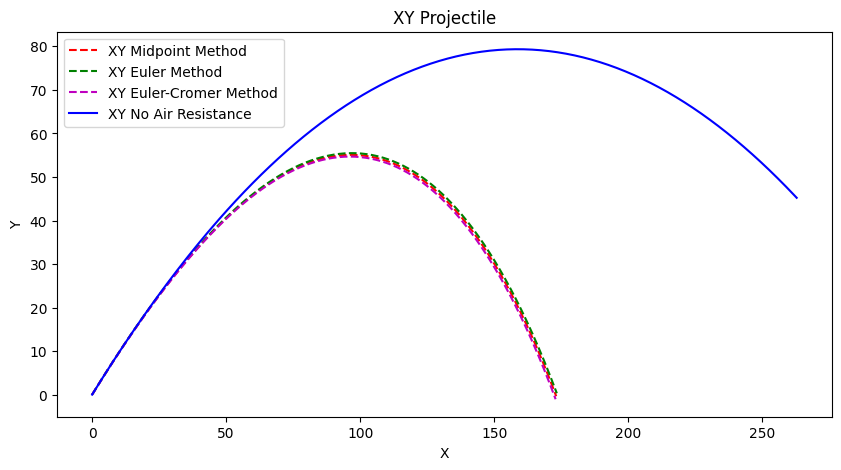

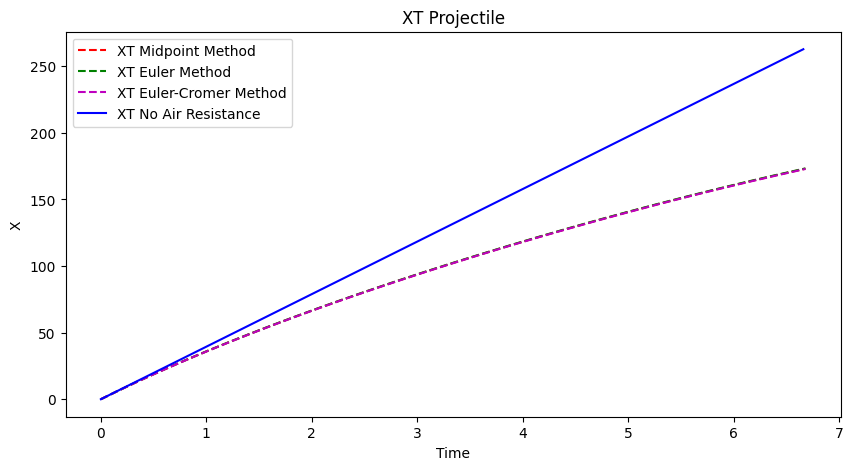

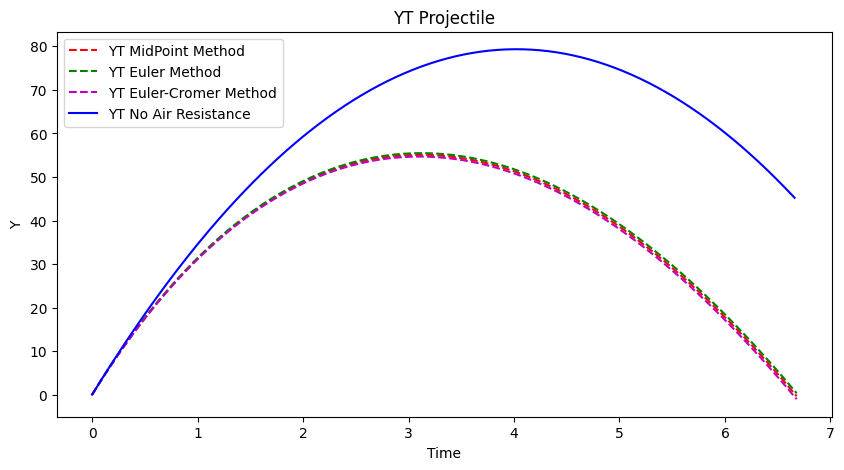

In [7]:
import matplotlib.pyplot as plt
import numpy as np

xcanvas = 1000
ycanvas = 500

# Create figures and axes for the XY projectile plot, XT projectile plot, and YT projectile plot
fig1, ax1 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))
fig2, ax2 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))
fig3, ax3 = plt.subplots(figsize=(xcanvas / 100, ycanvas / 100))

# Plot the XY projectile data
ax1.plot(xplot, yplot, 'r--', label='XY Midpoint Method')
ax1.plot(xplote, yplote, 'g--', label='XY Euler Method')
ax1.plot(xplotec, yplotec, 'm--', label='XY Euler-Cromer Method')
ax1.plot(xNoAir,yNoAir, 'b-', label='XY No Air Resistance')
ax1.set_title('XY Projectile')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

# Plot the XT projectile data
ax2.plot(time, xplot, 'r--', label='XT Midpoint Method')
ax2.plot(timee, xplote, 'g--', label='XT Euler Method')
ax2.plot(timeec, xplotec, 'm--', label='XT Euler-Cromer Method')
ax2.plot(timeNoAir, xNoAir, 'b-', label='XT No Air Resistance')
ax2.set_title('XT Projectile')
ax2.set_xlabel('Time')
ax2.set_ylabel('X')
ax2.legend()

# Plot the YT projectile data
ax3.plot(time, yplot, 'r--', label='YT MidPoint Method')
ax3.plot(timee, yplote, 'g--', label='YT Euler Method')
ax3.plot(timeec, yplotec, 'm--', label='YT Euler-Cromer Method')
ax3.plot(timeNoAir, yNoAir, 'b-', label='YT No Air Resistance')
ax3.set_title('YT Projectile')
ax3.set_xlabel('Time')
ax3.set_ylabel('Y')
ax3.legend()

# Show the plots
plt.show()
